### **Detecção de armas em Escolas**
Copyright 2020 The GooGolPlex Authors.
Licensed under the Apache License, Version 2.0 (the "License");

*   Data Scientist Jose R F Junior - web2ajax@gmail.com
*   Project: Glock

In [11]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 47kB/s 
     |████████████████████████████████| 3.0MB 48.9MB/s 
     |████████████████████████████████| 419kB 59.6MB/s 


In [0]:
import os
from numpy.random import seed
from tensorflow import set_random_seed

In [0]:
os.environ['KAGGLE_USERNAME'] = "juniorosho"
os.environ['KAGGLE_KEY'] = "0d77c9fe1fd290700459161f517b35a2"

seed(100)
set_random_seed(100)

## 00.1 Funções auxiliares

In [0]:
def search_dir(type="normal", num=6):
  #Função auxiliar para verificar o conteúdo do diretório
  counter=0

  for file in os.listdir(train_dir + type.upper()+ "/"):
      if counter == num:
          break

      if file.endswith(".jpeg"):
          print(file)

      counter += 1

In [0]:
def plot_images(type="normal", num=6):
  #Função auxiliar para plotar imagens
  counter=0
  fig = plt.figure(figsize=(10, 8))
  

  for file in os.listdir(train_dir + type.upper()):

      if file.endswith(".jpeg"):
          if counter == num:
              break

          img = mpimg.imread(train_dir + type.upper()+"/"+file)
          plt.subplot(231+counter)
          plt.title(file.split('.')[0])
          imgplot = plt.imshow(img)

          counter += 1

In [0]:
def display_training_curves(training, validation, title, subplot):
  if subplot%10==1: # configurar as subparcelas na primeira chamada
    plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
    plt.tight_layout()
  ax = plt.subplot(subplot)
  ax.set_facecolor('#F8F8F8')
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['train', 'valid.'])

# 01 Download das imagens

In [1]:
%time 
from google.colab import drive
drive.mount('/content/drive')

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.53 µs
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp /content/drive/'My Drive'/armas_and_nao_filtered.zip /content/

In [4]:
!unzip /content/armas_and_nao_filtered.zip

Archive:  /content/armas_and_nao_filtered.zip
   creating: armas_and_nao_filtered/
   creating: armas_and_nao_filtered/train/
   creating: armas_and_nao_filtered/train/armas/
  inflating: armas_and_nao_filtered/train/armas/images(292)  
  inflating: armas_and_nao_filtered/train/armas/images(5)  
  inflating: armas_and_nao_filtered/train/armas/images(9)  
  inflating: armas_and_nao_filtered/train/armas/images(10)  
  inflating: armas_and_nao_filtered/train/armas/images(11)  
  inflating: armas_and_nao_filtered/train/armas/images(15)  
  inflating: armas_and_nao_filtered/train/armas/images(16)  
  inflating: armas_and_nao_filtered/train/armas/images(21)  
  inflating: armas_and_nao_filtered/train/armas/images(25)  
  inflating: armas_and_nao_filtered/train/armas/images(29)  
  inflating: armas_and_nao_filtered/train/armas/images(35)  
  inflating: armas_and_nao_filtered/train/armas/images(39)  
  inflating: armas_and_nao_filtered/train/armas/images(42)  
  inflating: armas_and_nao_filter

In [5]:
%time !unzip chest_xray.zip #27 seconds

unzip:  cannot find or open chest_xray.zip, chest_xray.zip.zip or chest_xray.zip.ZIP.
CPU times: user 18.9 ms, sys: 8.4 ms, total: 27.3 ms
Wall time: 2.72 s


In [6]:
%time
!pwd
dataset_path_new = "./armas_and_nao_filtered"

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
/content


# 02 Explore os Dados

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg

In [0]:
#Aponte para os diretórios relevantes
#train_dir = "chest_xray/train/"
#val_dir   = "chest_xray/test/" #diretórios para treinamento
#test_dir  = "chest_xray/val/" #diretório para pontuação do modelo final
train_dir = os.path.join(dataset_path_new, "train")
validation_dir = os.path.join(dataset_path_new, "validation")
test_dir  = os.path.join(dataset_path_new, "test")

train_arma_dir = os.path.join(train_dir, 'armas') 
train_nao_dir = os.path.join(train_dir, 'nao')  

validation_arma_dir = os.path.join(validation_dir, 'armas')  
validation_nao_dir = os.path.join(validation_dir, 'nao')  




In [0]:
num_arma_tr = len(os.listdir(train_arma_dir))
num_nao_tr = len(os.listdir(train_nao_dir))

num_arma_val = len(os.listdir(validation_arma_dir))
num_nao_val = len(os.listdir(validation_nao_dir))

total_train = num_arma_tr + num_nao_tr
total_val = num_arma_val + num_nao_val

In [18]:
print('total training arma images:', num_arma_tr)
print('total training nao images:', num_nao_tr)

print('total validation arma images:', num_arma_val)
print('total validation nao images:', num_nao_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training arma images: 4730
total training nao images: 407
total validation arma images: 4730
total validation nao images: 407
--
Total training images: 5137
Total validation images: 5137


# 03 Modelo

## 03.01 Modelo Pré-Treinado sem Transferência de Aprendizado

In [24]:
import numpy as np

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions

from tensorflow.python.keras.preprocessing import image


Using TensorFlow backend.


In [25]:
pre_model = InceptionV3(weights='imagenet')















96116736/96112376 [==============================] - 3s 0us/step


In [30]:
img = image.load_img( "/content/armas_and_nao_filtered/train/armas/21.jpeg", 
                     target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = pre_model.predict(x)
for index, res in enumerate(decode_predictions(y)[0]):
    print('{}. {}: {:.3f}%'.format(index + 1, res[1], 100 * res[2]))

40960/35363 [==================================] - 0s 0us/step
1. revolver: 96.445%
2. holster: 0.797%
3. assault_rifle: 0.735%
4. power_drill: 0.216%
5. rifle: 0.184%


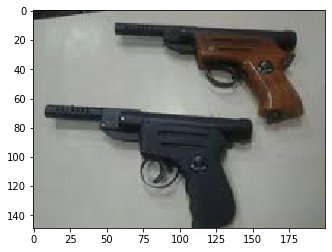

In [32]:
img = mpimg.imread("/content/armas_and_nao_filtered/train/armas/21.jpeg")
imgplot = plt.imshow(img)

## 03.2 Preparação de dados

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
batch_size=163


#Criar gerador de dados de treinamento
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1) #Criar gerador de imagens em abstrato

In [41]:
train_generator = train_datagen.flow_from_directory(
        train_dir, #diretório que contém dados de treinamento
        target_size=(150, 150), #que tamanho de imagem queremos
        batch_size=batch_size, #quantos arquivos para ler de cada vez
        class_mode="categorical") 

Found 4465 images belonging to 2 classes.


In [42]:
#Criar gerador de dados de validação

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode="categorical")

Found 4465 images belonging to 2 classes.


In [0]:
#Criar gerador de teste de validação

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode="categorical",
        shuffle=False)

Found 16 images belonging to 2 classes.


#03.03 Treinar o Modelo

In [0]:
import keras


In [46]:
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)


for layer in base_model.layers:
  layer.trainable = False  # Congele as camadas para não treinar
  
final_model = keras.models.Model(inputs=base_model.inputs, outputs=predictions) #Cria Modelo Final



87916544/87910968 [==============================] - 2s 0us/step


In [0]:
final_model.compile(loss ="categorical_crossentropy", #outro termo para perda de log
                    optimizer = "adam", 
                    metrics=["accuracy"])


In [65]:
fit_history = final_model.fit_generator(
        train_generator, #gerador de dados treinados
        steps_per_epoch=len(train_generator),
        epochs=5,
        validation_data=val_generator, #validador dedos gerados
        validation_steps=len(val_generator))

Epoch 1/5
28/28 [==============================] - 79s 3s/step - loss: 0.0216 - acc: 0.9956 - val_loss: 0.0357 - val_acc: 0.9957
Epoch 2/5
28/28 [==============================] - 62s 2s/step - loss: 0.0142 - acc: 0.9967 - val_loss: 0.0406 - val_acc: 0.9957
Epoch 3/5
28/28 [==============================] - 62s 2s/step - loss: 0.0126 - acc: 0.9967 - val_loss: 0.0574 - val_acc: 0.9944
Epoch 4/5
28/28 [==============================] - 62s 2s/step - loss: 0.0108 - acc: 0.9969 - val_loss: 0.0243 - val_acc: 0.9969
Epoch 5/5
28/28 [==============================] - 60s 2s/step - loss: 0.0086 - acc: 0.9974 - val_loss: 0.0241 - val_acc: 0.9944


In [0]:
display_training_curves(fit_history.history['acc'], fit_history.history['val_acc'], 'accuracy', 211)
display_training_curves(fit_history.history['loss'], fit_history.history['val_loss'], 'loss', 212)

In [0]:
result  = final_model.evaluate_generator(test_generator,steps=len(test_generator))
print('Loss:', result[0])
print('Accuracy:', result[1])

In [55]:
train_generator.class_indices

{'armas': 0, 'nao': 1}

In [0]:
#Gere todas as previsões
filenames = test_generator.filenames
nb_samples = len(filenames)
predict = final_model.predict_generator(test_generator,steps = nb_samples).argmax(axis=-1)

predict

In [0]:
#Gere true labels
test_generator.classes

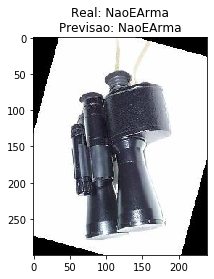

In [77]:
#@Caminho do arquivo, da imagem para testar
filename = "/content/armas_and_nao_filtered/test/image_0005.jpg" #@param {type:"string"}

img = image.load_img(filename, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = final_model.predict(x)

predicton="Arma" if y.argmax(axis=-1)==0 else "NaoEArma"
actual="Arma" if "Arma" in filename else "NaoEArma" 

img=mpimg.imread(filename)
title_text = ("%s%s%s%s%s"%("Real: ", actual, "\n", "Previsao: ", predicton))
plt.title(title_text)
imgplot=plt.imshow(img)

